# Welcome to the [30 Days of ML competition](https://www.kaggle.com/c/30-days-of-ml/overview)!

<center><img src='https://storage.googleapis.com/kaggle-media/Images/30_Days_ML_Hero.png' width='480' height="480" ></center>

#### This notebook will go through an extensive analysis to view and explore the `30 Days of ML` competition data, there will be some "well, maybe a lot of" redundancies but come on that's why "extensive" is in the name, also this notebook is a work in progress so there is a lot to be added later.
<h4><font color='darkred'>Please note that this work you're about to see here is not memory efficient at all but this notebook was meant to be extensive to explore different approaches also the data is not that big</font></h4>


### The notebook will have the following sections:
 #### - [Data Imports and initial exploring](#load_data).
 #### - [exploratory data analysis "EDA"](#EDA).
 #### - [Cleaning and feature Engineering starter](#ft_eng).
 #### - [XGBOOST starter](#xgb). 


<h2><center>Let's dive right in!</center></h2>
<center><img src="https://64.media.tumblr.com/801c1d244924a60dfae54af4924dda9e/033f51f7de7447be-d9/s1280x1920/6343410ac221ab8bc34c005c19b2718d8f1e96a3.gifv"></center>

In [1]:
# imports
import gc
import time
from IPython.display import Image, display
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 20)
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from termcolor import colored
%matplotlib inline
sns.set_style('darkgrid')
# import plotly.express as px
# import plotly.graph_objects as go

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split as split
from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA
# from sklearn.cluster import k_means 
from sklearn.model_selection import GridSearchCV as Grid
import xgboost as xgb
from sklearn.metrics import (mean_absolute_error, r2_score,mean_squared_error)

<a id='load_data'></a>
## Loading Data and exploring main statistics 

We set `index_col=0` in the code cell below to use the `id` column to index the DataFrame.

In [2]:
train = pd.read_csv("../input/30-days-of-ml/train.csv", index_col=0)
test = pd.read_csv("../input/30-days-of-ml/test.csv", index_col=0)

# Preview the data
train.head()

cat0 cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9  ...     cont5     cont6  \
id                                                    ...                       
1     B    B    B    C    B    B    A    E    C    N  ...  0.400361  0.160266   
2     B    B    A    A    B    D    A    F    A    O  ...  0.533087  0.558922   
3     A    A    A    C    B    D    A    D    A    F  ...  0.650609  0.375348   
4     B    B    A    C    B    D    A    E    C    K  ...  0.668980  0.239061   
6     A    A    A    C    B    D    A    E    A    N  ...  0.686964  0.420667   

       cont7     cont8     cont9    cont10    cont11    cont12    cont13  \
id                                                                         
1   0.310921  0.389470  0.267559  0.237281  0.377873  0.322401  0.869850   
2   0.516294  0.594928  0.341439  0.906013  0.921701  0.261975  0.465083   
3   0.902567  0.555205  0.843531  0.748809  0.620126  0.541474  0.763846   
4   0.732948  0.679618  0.574844  0.346010  0.714610  0.540150  0.280682   
6   0.648182  0.684501  0.956692  1.000773  0.776742  0.625849  0.250823   

      target  
id            
1   8.113634  
2   8.481233  
3   8.364351  
4   8.049253  
6   7.972260  

[5 rows x 25 columns]

In [3]:
train.describe()

cont0          cont1          cont2          cont3  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean        0.527335       0.460926       0.490498       0.496689   
std         0.230599       0.214003       0.253346       0.219199   
min        -0.118039      -0.069309      -0.056104       0.130676   
25%         0.405965       0.310494       0.300604       0.329783   
50%         0.497053       0.427903       0.502462       0.465026   
75%         0.668060       0.615113       0.647512       0.664451   
max         1.058443       0.887253       1.034704       1.039560   

               cont4          cont5          cont6          cont7  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean        0.491654       0.510526       0.467476       0.537119   
std         0.240074       0.228232       0.210331       0.218140   
min         0.255908       0.045915      -0.224689       0.203763   
25%         0.284188       0.354141       0.342873       0.355825   
50%         0.390470       0.488865       0.429383       0.504661   
75%         0.696599       0.669625       0.573383       0.703441   
max         1.055424       1.067649       1.111552       1.032837   

               cont8          cont9         cont10         cont11  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean        0.498456       0.474872       0.474492       0.473216   
std         0.239920       0.218007       0.255949       0.222022   
min        -0.260275       0.117896       0.048732       0.052608   
25%         0.332486       0.306874       0.276017       0.308151   
50%         0.439151       0.434620       0.459975       0.433812   
75%         0.606056       0.614333       0.691579       0.642057   
max         1.040229       0.982922       1.055960       1.071444   

              cont12         cont13         target  
count  300000.000000  300000.000000  300000.000000  
mean        0.494561       0.508273       8.241979  
std         0.247292       0.222950       0.746555  
min        -0.074208       0.151050       0.140329  
25%         0.289074       0.300669       7.742071  
50%         0.422887       0.472400       8.191373  
75%         0.714502       0.758447       8.728634  
max         0.975035       0.905992      10.411992

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 1 to 499999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat0    300000 non-null  object 
 1   cat1    300000 non-null  object 
 2   cat2    300000 non-null  object 
 3   cat3    300000 non-null  object 
 4   cat4    300000 non-null  object 
 5   cat5    300000 non-null  object 
 6   cat6    300000 non-null  object 
 7   cat7    300000 non-null  object 
 8   cat8    300000 non-null  object 
 9   cat9    300000 non-null  object 
 10  cont0   300000 non-null  float64
 11  cont1   300000 non-null  float64
 12  cont2   300000 non-null  float64
 13  cont3   300000 non-null  float64
 14  cont4   300000 non-null  float64
 15  cont5   300000 non-null  float64
 16  cont6   300000 non-null  float64
 17  cont7   300000 non-null  float64
 18  cont8   300000 non-null  float64
 19  cont9   300000 non-null  float64
 20  cont10  300000 non-null  float64
 21  cont11  30

In [5]:
train.isnull().sum()

cat0      0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
target    0
dtype: int64

In [6]:
features = train.drop(['target'], axis=1)

#### To easily distinguish them we will extract the name of the columns of different data types

In [7]:
num_col = list(train.select_dtypes(include='float64').columns)
cat_cols = list(train.select_dtypes(include='object').columns)
num_col.remove('target')
print('Number of numerical columns is:',colored(len(num_col),'green'),
      '\nNumber of categorical columsn is:',colored(len(cat_cols),'green'))

Number of numerical columns is: 14 
Number of categorical columsn is: 10


#### Assuring that test data and whether or not it has the same columns as the train

In [8]:
list(test.columns) == list(features.columns)

True

In [9]:
test.describe()

cont0          cont1          cont2          cont3  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.526858       0.460882       0.491686       0.496263   
std         0.230506       0.213896       0.252852       0.219304   
min        -0.117993      -0.069316      -0.056095       0.130655   
25%         0.405787       0.310536       0.302189       0.328865   
50%         0.496602       0.427656       0.503075       0.464590   
75%         0.666389       0.615041       0.648234       0.663401   
max         1.058434       0.887253       1.034687       1.039558   

               cont4          cont5          cont6          cont7  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.492200       0.509944       0.468050       0.537617   
std         0.240251       0.228100       0.210167       0.218197   
min         0.255903       0.045921      -0.224613       0.203763   
25%         0.284188       0.353682       0.342813       0.356482   
50%         0.395080       0.488378       0.429819       0.505216   
75%         0.697252       0.668586       0.573861       0.703289   
max         1.055423       1.067641       1.111540       1.032823   

               cont8          cont9         cont10         cont11  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.497587       0.474630       0.473625       0.473589   
std         0.239337       0.217558       0.255307       0.221844   
min        -0.260236       0.117894       0.048734       0.052615   
25%         0.332762       0.306940       0.274991       0.308495   
50%         0.438716       0.434610       0.460042       0.433857   
75%         0.605368       0.610768       0.690143       0.642201   
max         1.040208       0.982928       1.055955       1.071445   

              cont12         cont13  
count  200000.000000  200000.000000  
mean        0.492756       0.508303  
std         0.247105       0.222977  
min        -0.074201       0.151052  
25%         0.288094       0.300697  
50%         0.422065       0.472446  
75%         0.711038       0.758496  
max         0.975032       0.906013

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 499995
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat0    200000 non-null  object 
 1   cat1    200000 non-null  object 
 2   cat2    200000 non-null  object 
 3   cat3    200000 non-null  object 
 4   cat4    200000 non-null  object 
 5   cat5    200000 non-null  object 
 6   cat6    200000 non-null  object 
 7   cat7    200000 non-null  object 
 8   cat8    200000 non-null  object 
 9   cat9    200000 non-null  object 
 10  cont0   200000 non-null  float64
 11  cont1   200000 non-null  float64
 12  cont2   200000 non-null  float64
 13  cont3   200000 non-null  float64
 14  cont4   200000 non-null  float64
 15  cont5   200000 non-null  float64
 16  cont6   200000 non-null  float64
 17  cont7   200000 non-null  float64
 18  cont8   200000 non-null  float64
 19  cont9   200000 non-null  float64
 20  cont10  200000 non-null  float64
 21  cont11  20

In [11]:
test.isnull().sum()

cat0      0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
dtype: int64

#### Checking if test categorical unqiue values are all subsets of their train peers

In [12]:
lis = []
for i in features[cat_cols].columns:
    test_vals = set(features[i].unique())
    train_vals = set(features[i].unique())
    lis.append(test_vals.issubset(train_vals))

print(all(lis))

True


<center><img src="https://c.tenor.com/EGhxbE0xUvIAAAAC/we-good-thumbs-up.gif"></center>

> #### Well Data seems to be pretty much preprocessed "I mean it's synthetic after all" so no nulls exists and also even if features are anonymous they are ordered in a proper easy to the eye way.

<a id='EDA'></a>
## EDA

#### Now we start exploring the data set , mainly there are three main groups of variables to explore as follows:
##### 1. Categorical columns.
##### 2. Continuous "numerical" columns.
##### 3. Target.

### Categorical variables

#### Number of categorical unique values

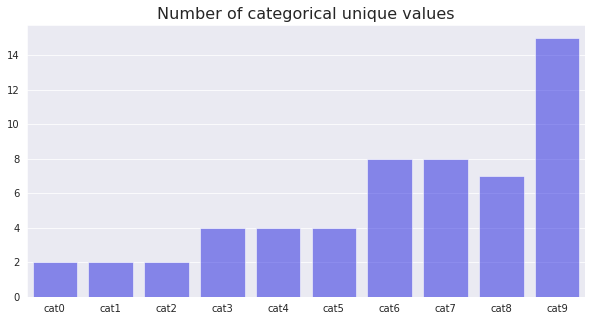

In [13]:
fig = plt.figure(figsize=(10,5))
sns.barplot(y=train[cat_cols].nunique().values, x=train[cat_cols].nunique().index, color='blue', alpha=.5)
plt.xticks(rotation=0)
plt.title('Number of categorical unique values',fontsize=16);

> #### Most of columns seems to have few categorical unique values except cat9 column.

#### Categorical features unique values count

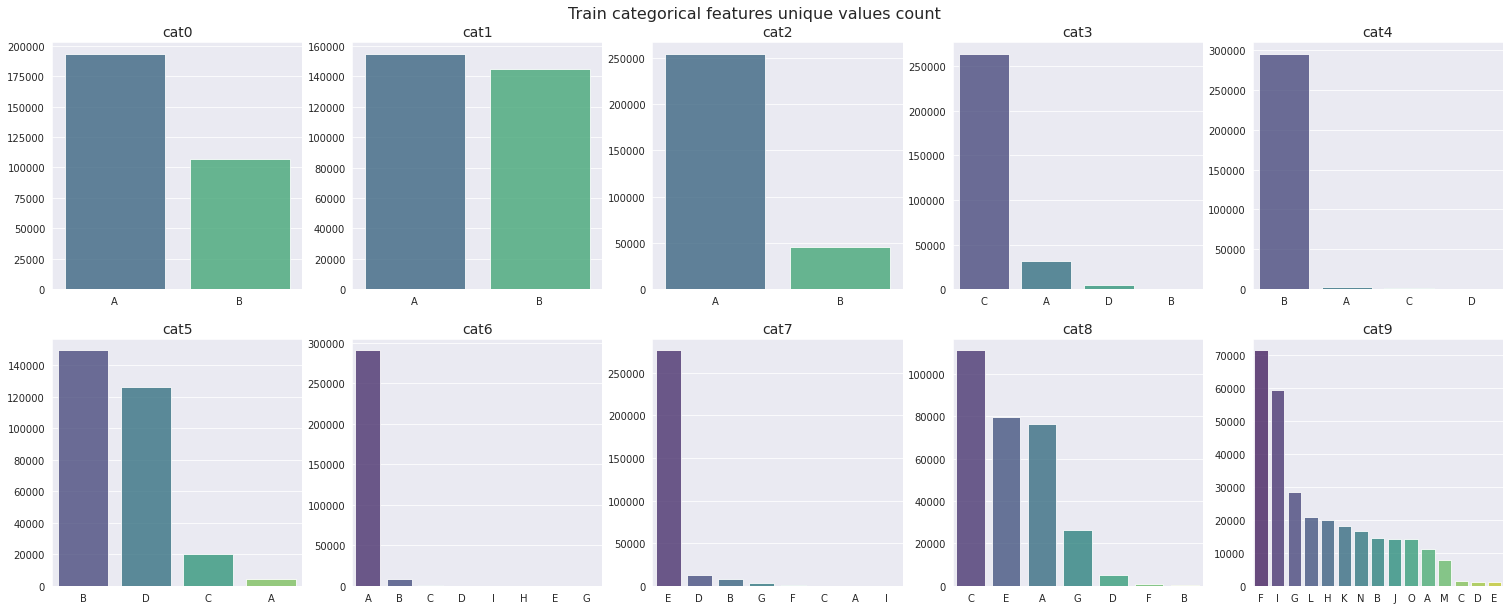

In [14]:
fig = plt.figure(figsize=(26,10))
grid =  gridspec.GridSpec(2,5,figure=fig,hspace=.2,wspace=.2)
n =0
for i in range(2):
    for j in range(5):
        ax = fig.add_subplot(grid[i, j])
        order = list(train['cat'+str(n)].value_counts().index)
        sns.countplot(data= train, x='cat'+str(n),ax=ax, alpha =0.8,order=order,palette='viridis')
        ax.set_title('cat'+str(n),fontsize=14)
        ax.set_xlabel('')
        ax.set_ylabel('')
        n += 1
fig.suptitle('Train categorical features unique values count', fontsize=16,y=.93);

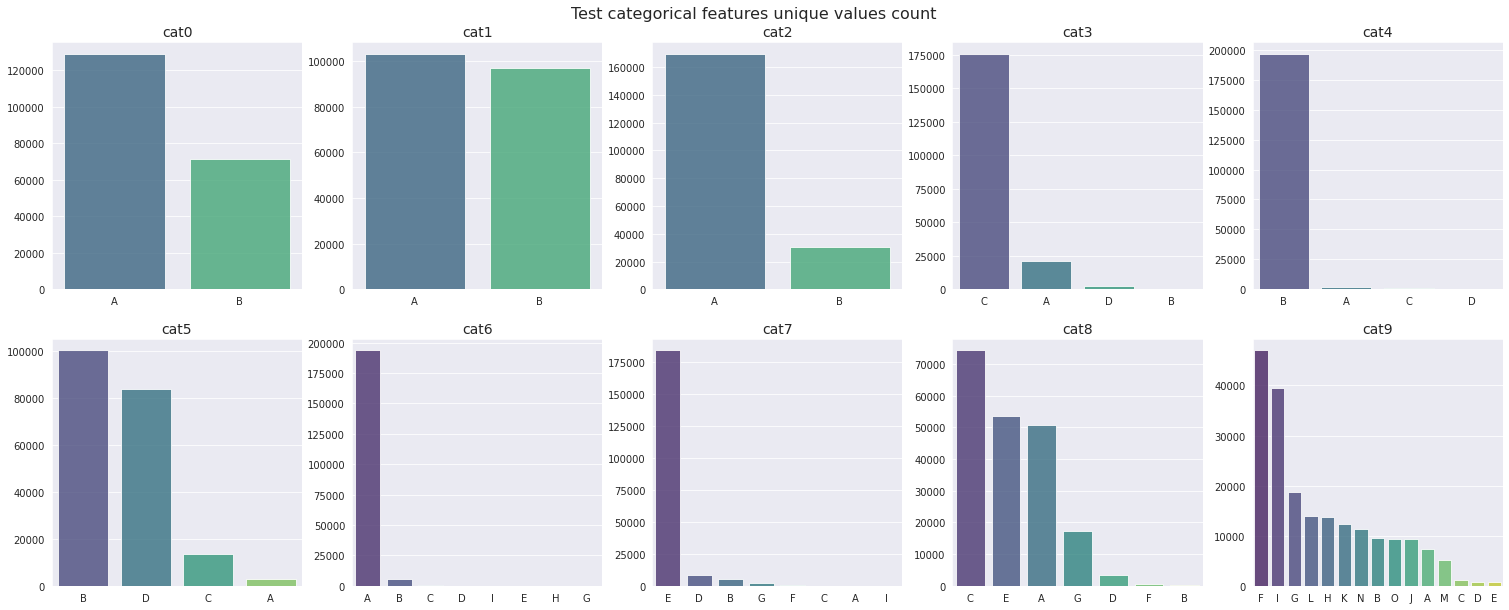

In [15]:
fig = plt.figure(figsize=(26,10))
grid =  gridspec.GridSpec(2,5,figure=fig,hspace=.2,wspace=.2)
n =0
for i in range(2):
    for j in range(5):
        ax = fig.add_subplot(grid[i, j])
        order = list(test['cat'+str(n)].value_counts().index)
        sns.countplot(data= test, x='cat'+str(n),ax=ax, alpha =0.8,order=order,palette='viridis')
        ax.set_title('cat'+str(n),fontsize=14)
        ax.set_xlabel('')
        ax.set_ylabel('')
        n += 1
fig.suptitle('Test categorical features unique values count', fontsize=16,y=.93);

>#### Distribution of unique values in test and train data looks pretty much similar.

#### Distribution of categorical features unique values and target

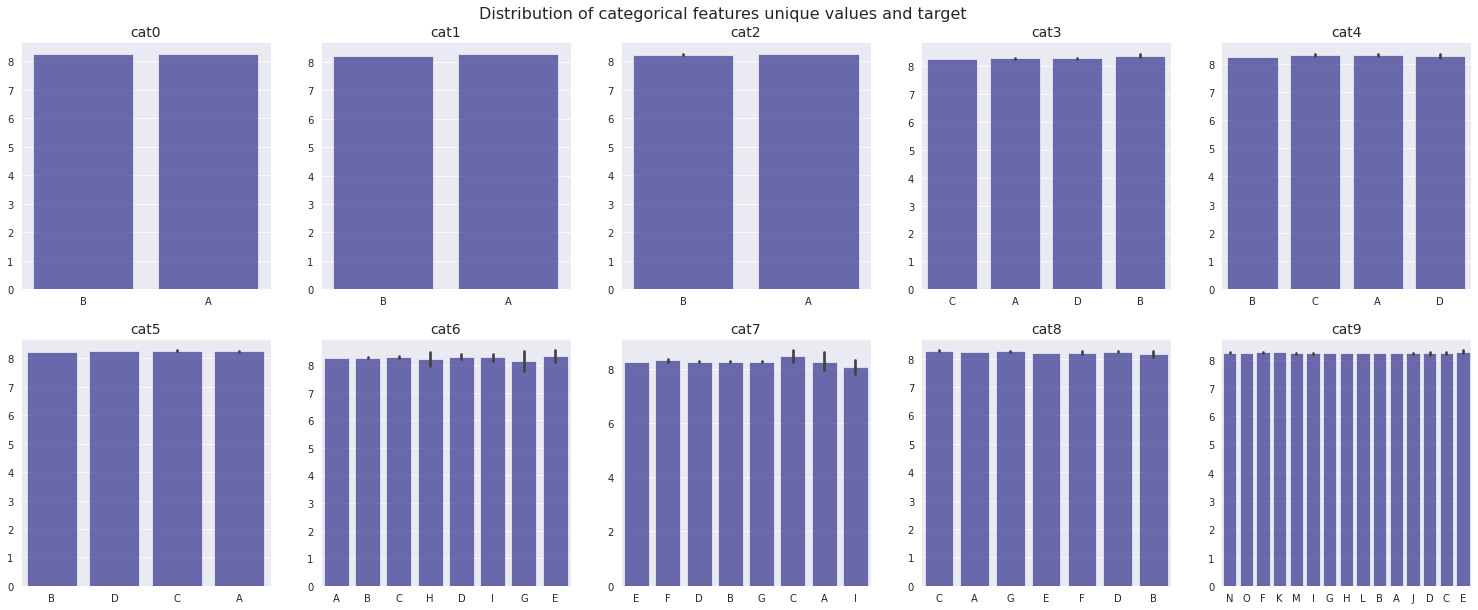

In [16]:
fig = plt.figure(figsize=(26,10))
grid =  gridspec.GridSpec(2,5,figure=fig,hspace=.2,wspace=.2)
n =0
for i in range(2):
    for j in range(5):
        ax = fig.add_subplot(grid[i, j])
        sns.barplot(data= train, y = 'target', x='cat'+str(n),ax=ax, alpha =.6,ci=95, color= 'darkblue',dodge=False )
        ax.set_title('cat'+str(n),fontsize=14)
        ax.set_xlabel('')
        ax.set_ylabel('')
        n += 1
fig.suptitle('Distribution of categorical features unique values and target', fontsize=16,y=.93);

> #### It looks like on the surface there is no clear relation between target and any of categorical variables' values.

#### KDE plot of target with categorical features

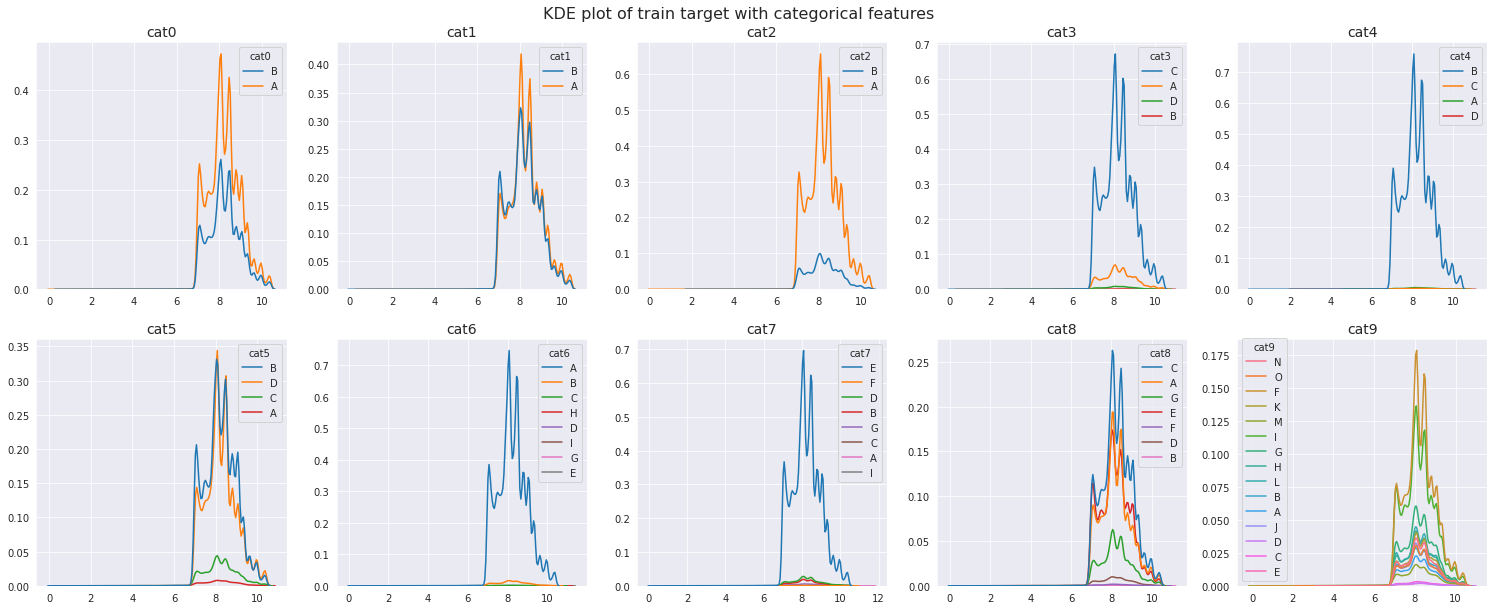

In [17]:
fig = plt.figure(figsize=(26,10))
grid =  gridspec.GridSpec(2,5,figure=fig,hspace=.2,wspace=.2)
n =0
for i in range(2):
    for j in range(5):
        ax = fig.add_subplot(grid[i, j])
        sns.kdeplot(data = train, x = 'target', hue = 'cat'+str(n),ax=ax, alpha =.7, fill=False)
        ax.set_title('cat'+str(n),fontsize=14)
        ax.set_xlabel('')
        ax.set_ylabel('')
        n += 1
fig.suptitle('KDE plot of train target with categorical features', fontsize=16,y=.93);

> #### This plot kinda agrees with previous one but it looks like the KDE of some categorical values are pretty much flat compared to other value.

#### Violin plot of target with categorical features

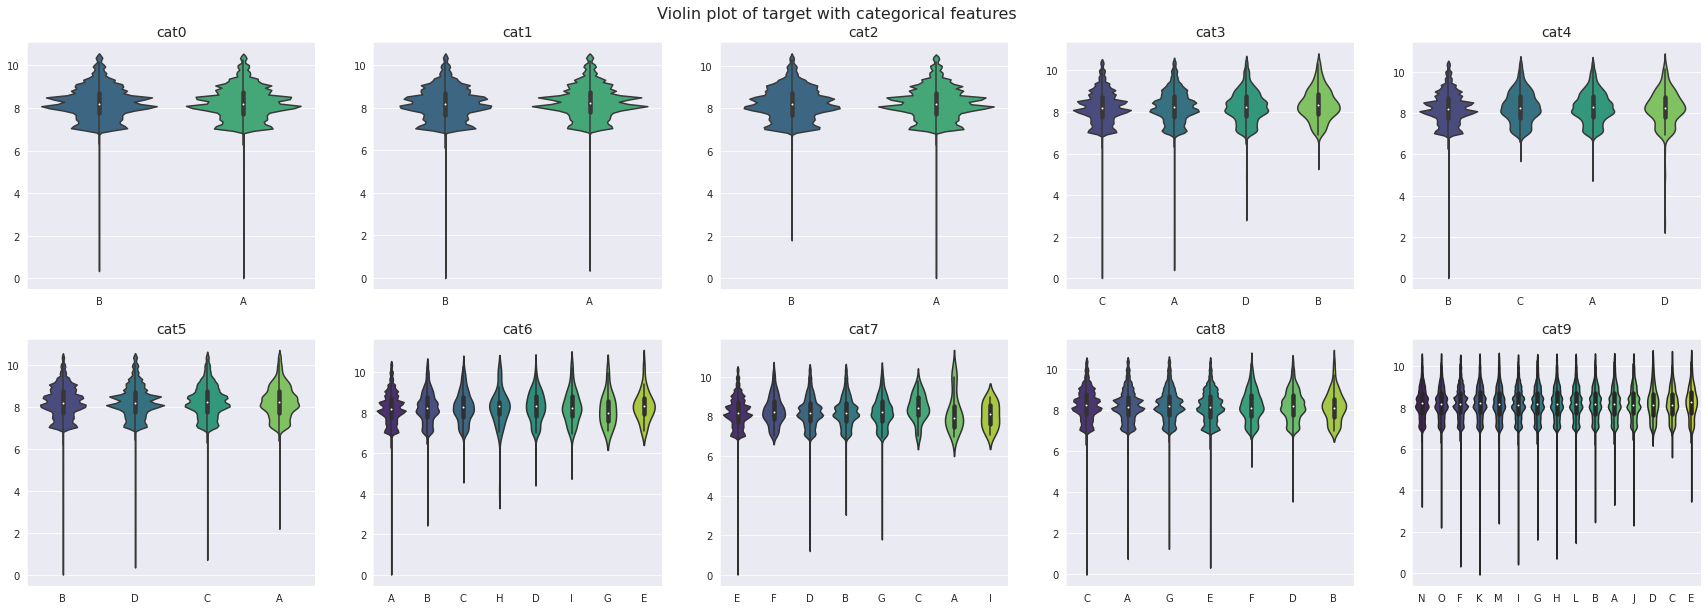

In [18]:
fig = plt.figure(figsize=(30,10))
grid =  gridspec.GridSpec(2,5,figure=fig,hspace=.2,wspace=.2)
n =0
for i in range(2):
    for j in range(5):
        ax = fig.add_subplot(grid[i, j])
        sns.violinplot(data = train, y = 'target', x = 'cat'+str(n),ax=ax, alpha =.7, fill=True,palette='viridis')
        ax.set_title('cat'+str(n),fontsize=14)
        ax.set_xlabel('')
        ax.set_ylabel('')
        n += 1
fig.suptitle('Violin plot of target with categorical features', fontsize=16,y=.93);

<center><img src="https://www.memesmonkey.com/images/memesmonkey/3f/3f459b9e453447e0bedded09eba42df6.jpeg"></center>

> #### This plot is a continuation to the KDE plot and it pretty muh agrees with it but we can also notice target outliers.

### Numerical Variables

#### Box plot of numerical columns

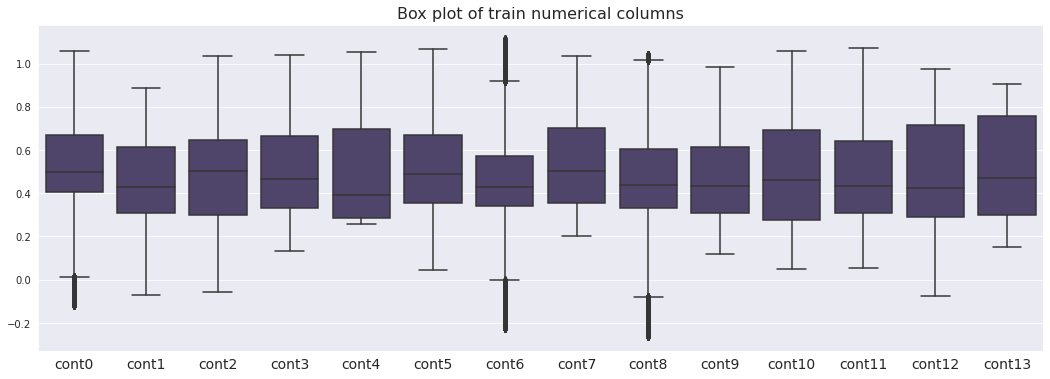

In [19]:
v0 = sns.color_palette(palette='viridis').as_hex()[0]
fig = plt.figure(figsize=(18,6))
sns.boxplot(data=train[num_col], color=v0,saturation=.5);
plt.xticks(fontsize= 14)
plt.title('Box plot of train numerical columns', fontsize=16);

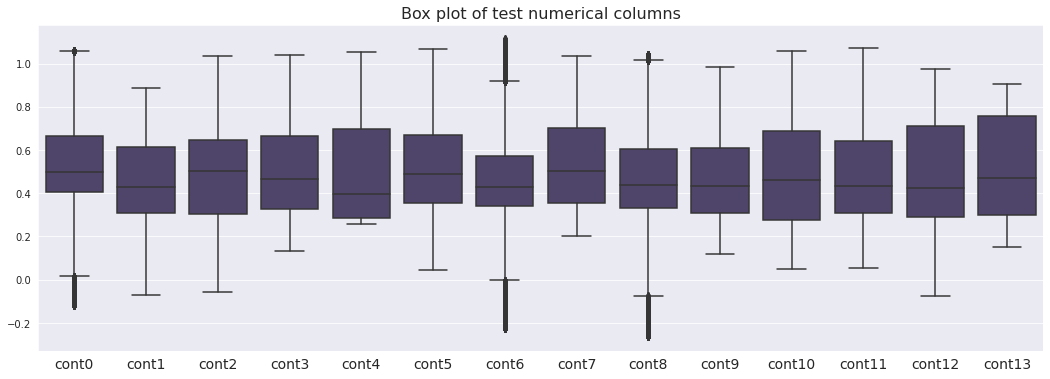

In [20]:
fig = plt.figure(figsize=(18,6))
sns.boxplot(data=test[num_col], color=v0,saturation=.5);
plt.xticks(fontsize= 14)
plt.title('Box plot of test numerical columns', fontsize=16);

> #### Numerical Data seems to be kinda normalized with few outliers appearing in the box plot Also test numerical data seems to looks like the train ones.

#### Histograms of numerical features

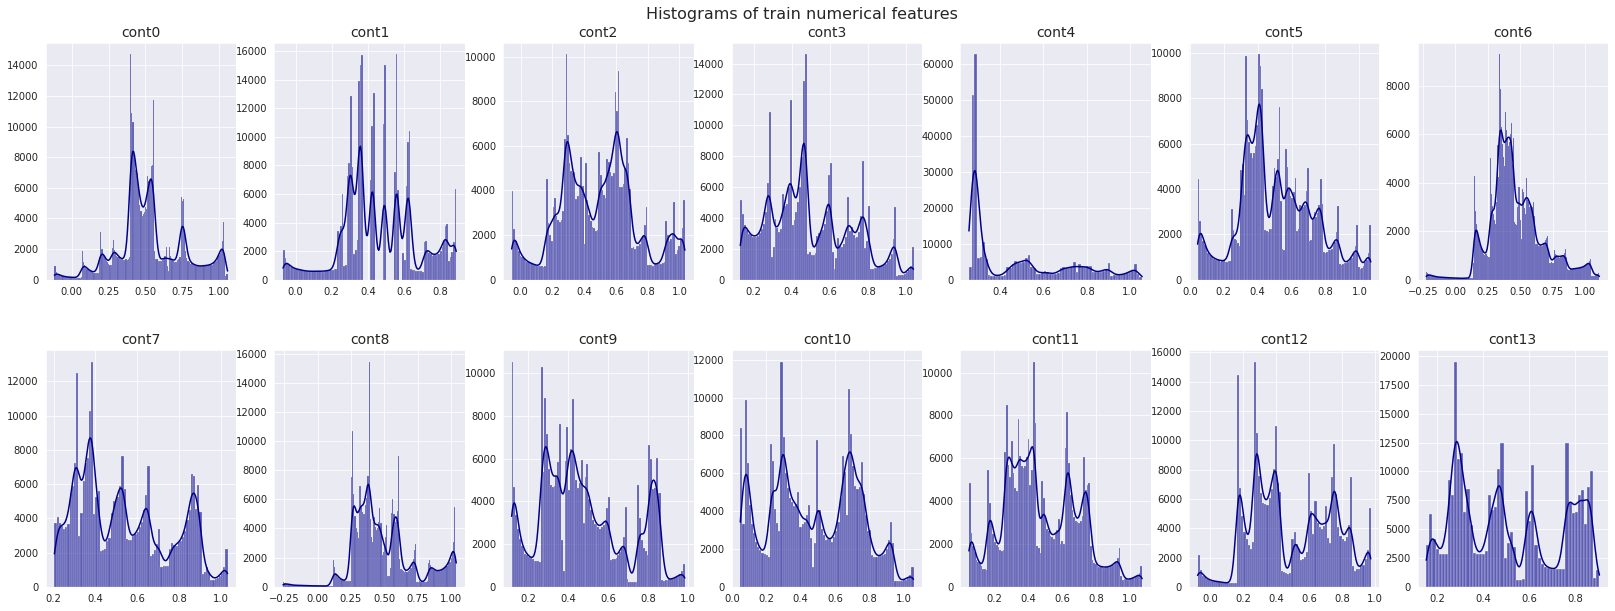

In [21]:
fig = plt.figure(figsize=(28,10))#,constrained_layout=True)
grid =  gridspec.GridSpec(2, 7, figure= fig, hspace= .3, wspace= .2)
n =0
for i in range(2):
    for j in range(7):
        ax = fig.add_subplot(grid[i, j])
        sns.histplot(data= train, x='cont'+str(n),ax=ax, alpha =.6, color= 'darkblue',kde=True)
        ax.set_title('cont'+str(n),fontsize=14)
        ax.set_xlabel('')
        ax.set_ylabel('')
        n += 1
        
fig.suptitle('Histograms of train numerical features', fontsize=16,y=.93);

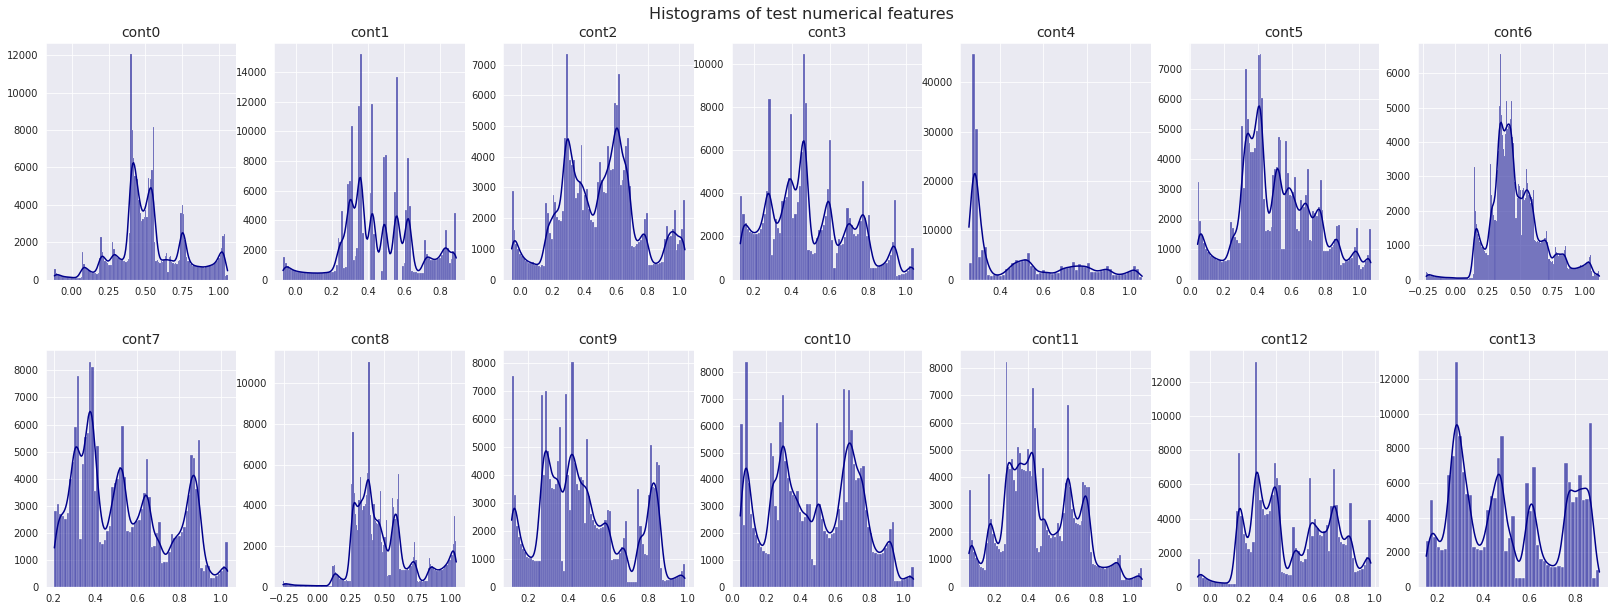

In [22]:
fig = plt.figure(figsize=(28,10))#,constrained_layout=True)
grid =  gridspec.GridSpec(2, 7, figure= fig, hspace= .3, wspace= .2)
n =0
for i in range(2):
    for j in range(7):
        ax = fig.add_subplot(grid[i, j])
        sns.histplot(data= test, x='cont'+str(n),ax=ax, alpha =.6, color= 'darkblue',kde=True)
        ax.set_title('cont'+str(n),fontsize=14)
        ax.set_xlabel('')
        ax.set_ylabel('')
        n += 1
        
fig.suptitle('Histograms of test numerical features', fontsize=16,y=.93);

> #### Histograms of numerical data show a desperation of values with what look like multinomial distributions, also column cont1 seems to have some areas where the distribution becomes kinda discrete and again test numerical data seems to be similar to train numerical data.

#### Scatter plot with Pearson coefficient of correlation of numerical features with target

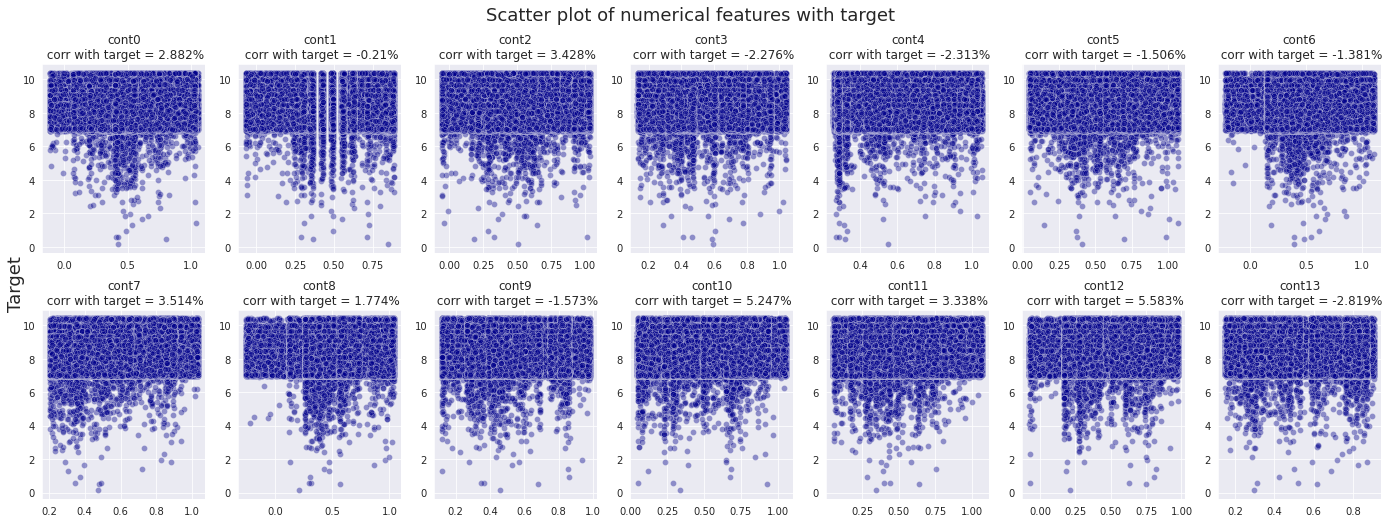

In [23]:
fig = plt.figure(figsize=(24,8))#,constrained_layout=True)
grid =  gridspec.GridSpec(2, 7, figure= fig, hspace= .3, wspace= .2)
n =0
for i in range(2):
    for j in range(7):
        ax = fig.add_subplot(grid[i, j])
        sns.scatterplot(data= train, x='cont'+str(n), y='target',ax=ax, alpha =.4, color= 'darkblue' )
        ax.set_title('cont{}\n corr with target = {}%'.format(str(n),round(100*(train['cont'+str(n)].corr(train.target)),3)),fontsize=12)
        ax.set_xlabel('')
        ax.set_ylabel('')
        n += 1
        
fig.suptitle('Scatter plot of numerical features with target', fontsize=18,y=.98)
fig.text(0.11,0.5, "Target", ha="center", va="center", rotation=90, fontsize=18);

#### Zooming on the correlation between numerical variables and target.

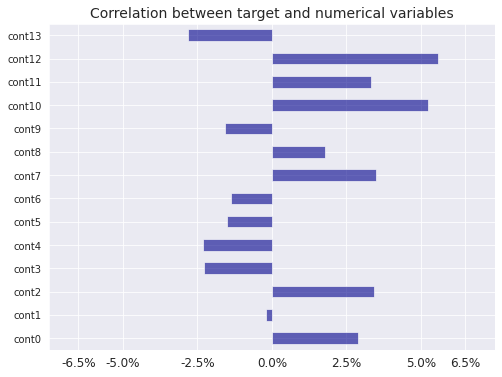

In [24]:
train.corr()['target'][:-1].plot.barh(figsize=(8,6),alpha=.6,color='darkblue')
plt.xlim(-.075,.075);
plt.xticks([-0.065, -0.05 , -0.025,  0.   ,  0.025,  0.05 ,  0.065],
           [str(100*i)+'%' for i in [-0.065, -0.05 , -0.025,  0.   ,  0.025,  0.05 ,  0.065]],fontsize=12)
plt.title('Correlation between target and numerical variables',fontsize=14);

> #### It's clear tat there isn't any clear relation between numerical variables and target.

#### Now Exploring correlation between all numerical variables.

#### First we get a correlation grid of all numercial variables and target

In [25]:
train.corr().style.background_gradient(cmap='viridis')

#### Showing a grid scatter plots to investigate the numbers shown above

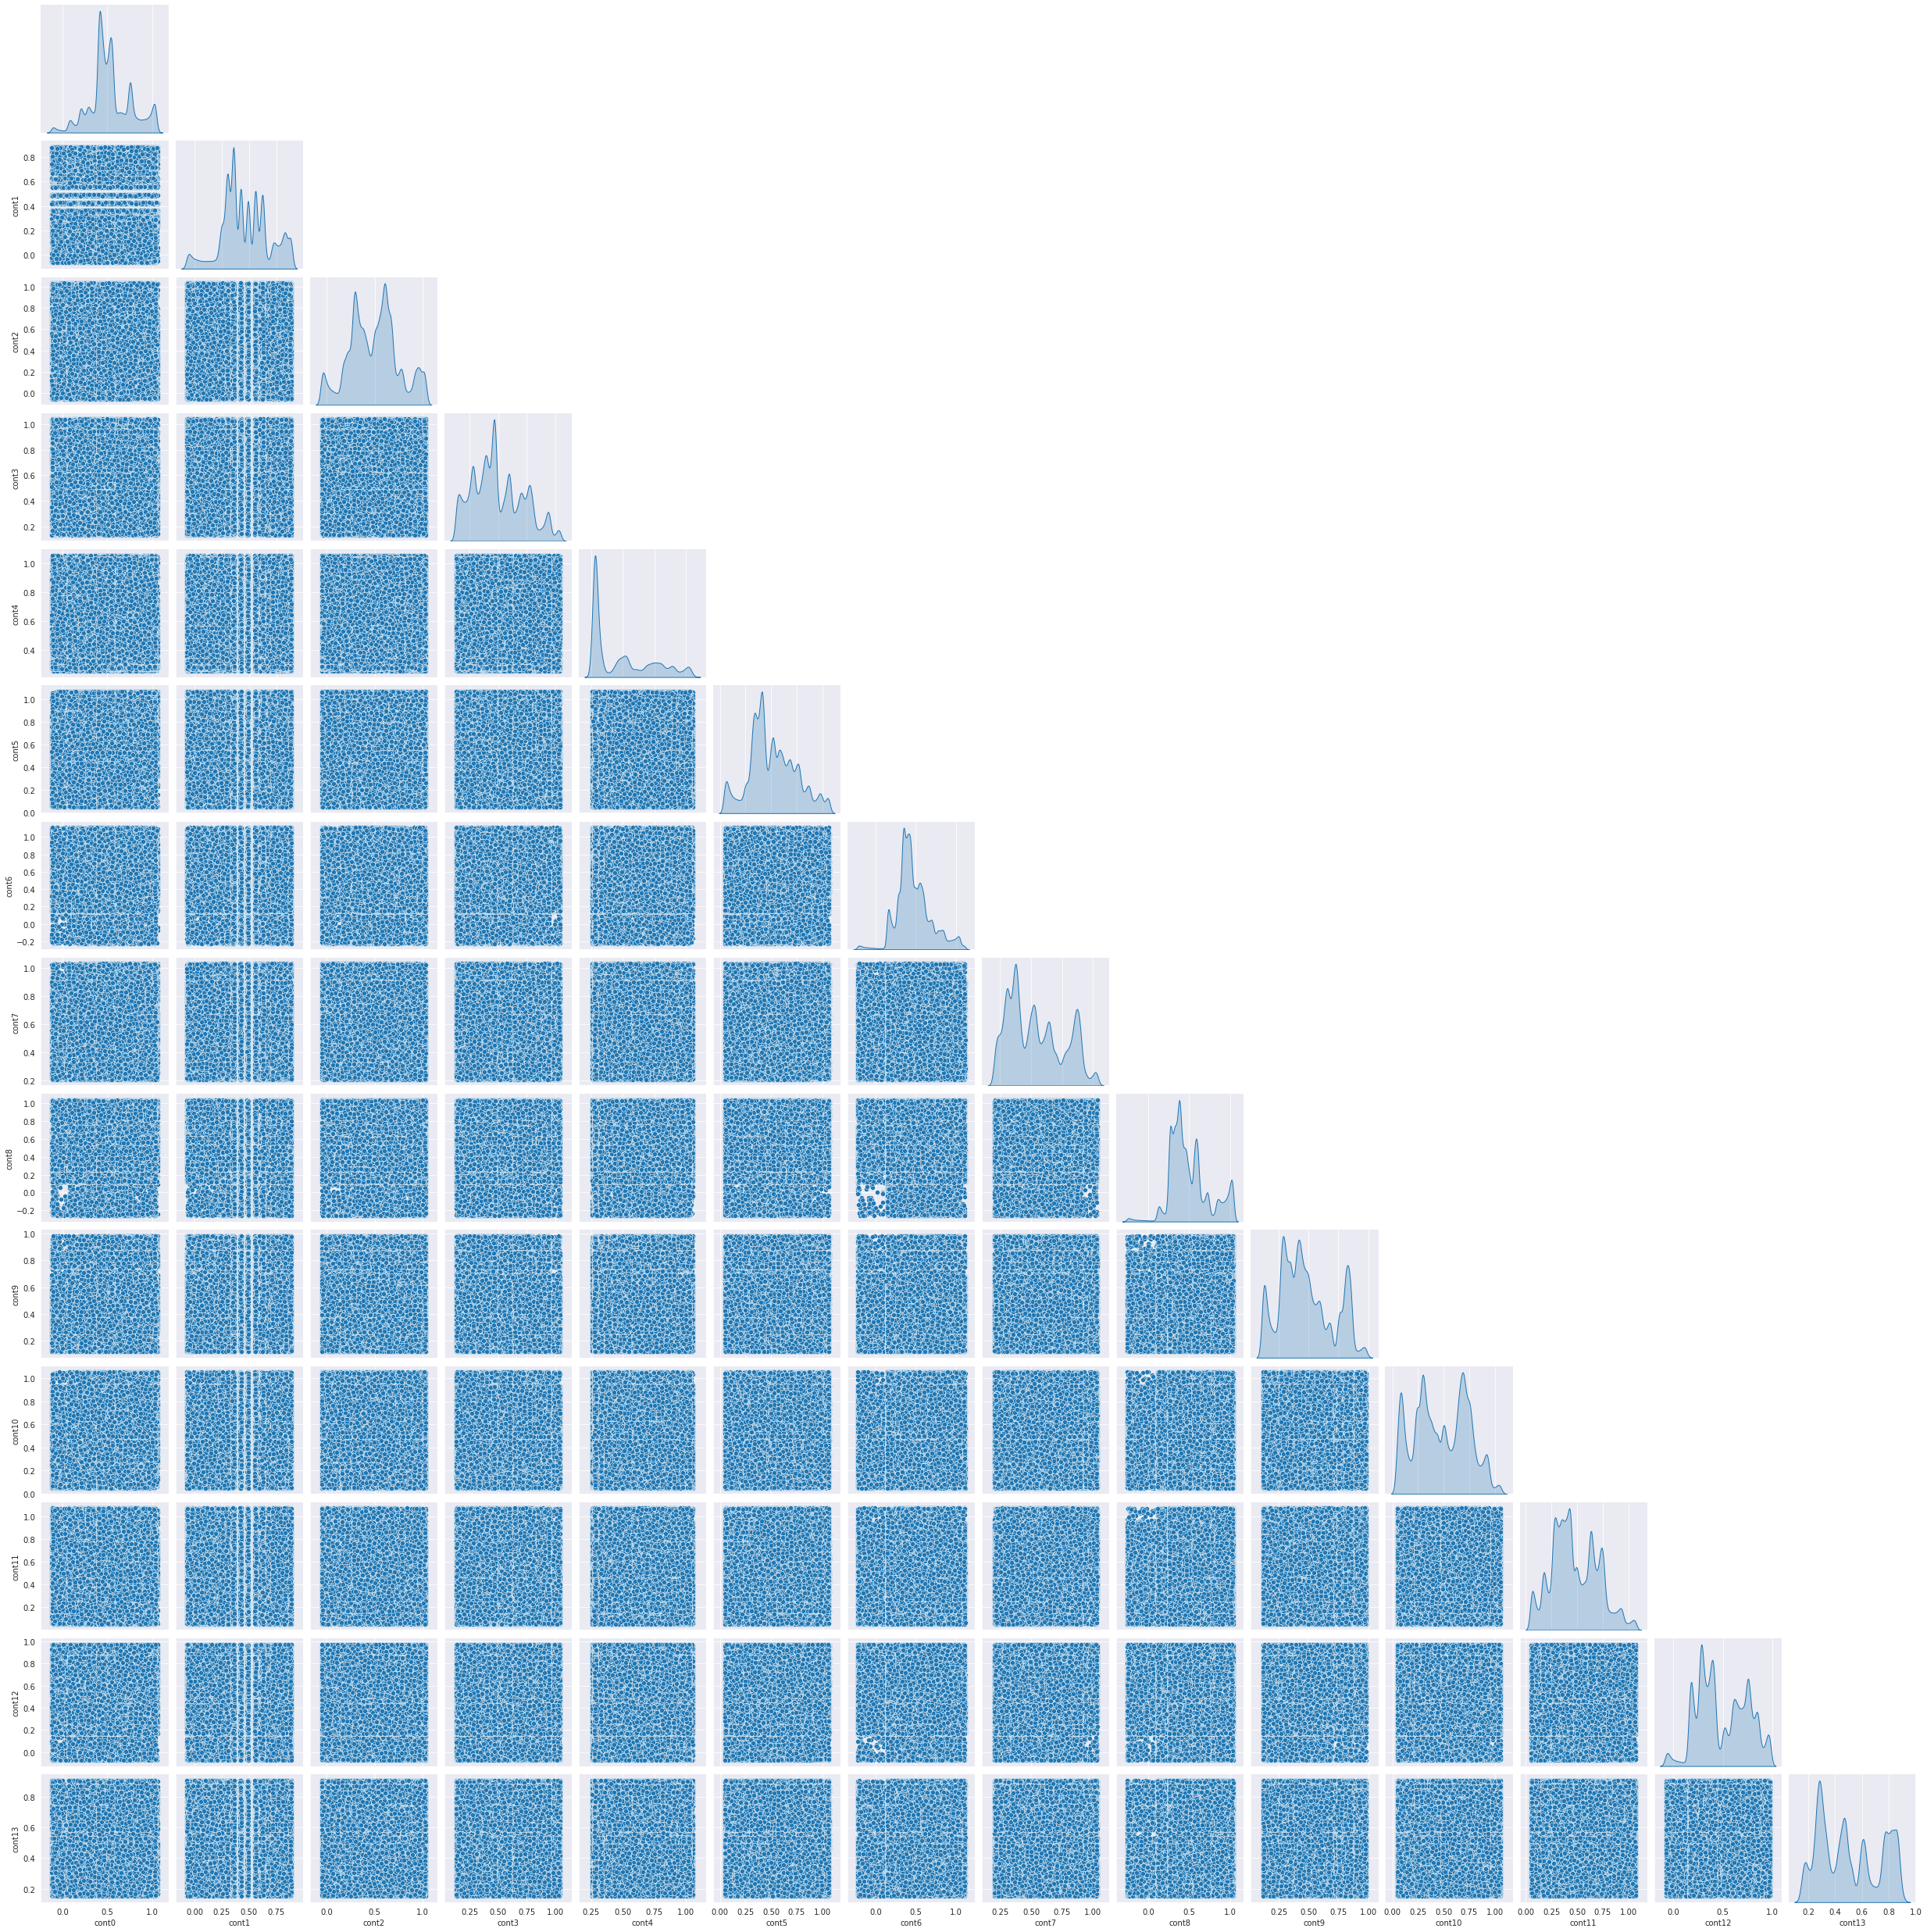

In [26]:
sns.pairplot(train[num_col], corner=True, diag_kind='kde');

> #### Well again as seen in the correlation grid there isn't strong relationship between variables, also these variables have kind of multinomial distributions.

### Target data


 #### separating the target (`y`) from the training features (which we assign to `features`).

In [27]:
y = train['target']

#### don't mind me,  just a sanity check 

In [28]:
(y.index == features.index).all()

True

<img src='https://c.tenor.com/_f5-QsYtLt0AAAAC/crazy-jim-carrey.gif'>

#### Standardizing target

#### Now we try to explore if standardizing target will yield anything intersting

In [29]:
scaler = StandardScaler()
y_scaled = pd.DataFrame(scaler.fit_transform(pd.DataFrame(y)))
y_scaled.columns = [y.name]
y_scaled.index = y.index
y_scaled.head()

target
id          
1  -0.171916
2   0.320478
3   0.163916
4  -0.258153
6  -0.361285

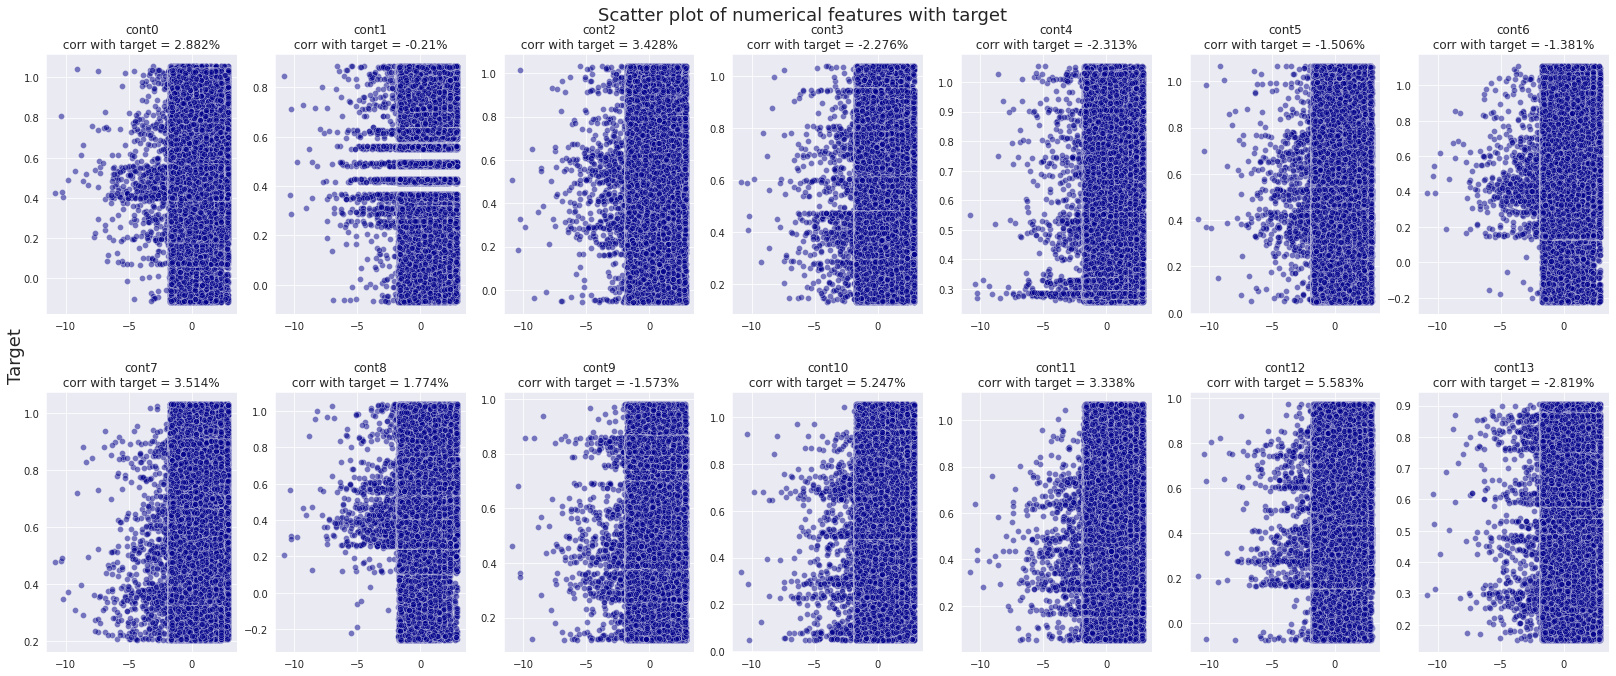

In [30]:
fig = plt.figure(figsize=(28,11))#,constrained_layout=True)
grid =  gridspec.GridSpec(2, 7, figure= fig, hspace= .3, wspace= .2)
n =0
for i in range(2):
    for j in range(7):
        ax = fig.add_subplot(grid[i, j])
        sns.scatterplot(data= train, y='cont'+str(n), x=y_scaled.target,ax=ax, alpha =.5, color= 'darkblue' )
        ax.set_title('cont{}\n corr with target = {}% '.format(str(n),round(100*(train['cont'+str(n)].corr(train.target)),3)),fontsize=12)
        ax.set_xlabel('')
        ax.set_ylabel('')
        n += 1
        
fig.suptitle('Scatter plot of numerical features with target', fontsize=18,y=.94)
fig.text(0.11,0.5, "Target", ha="center", va="center", rotation=90, fontsize=18);

> #### Nothing impressive but xticks seems to relatively have few "negative" amounts

#### exploring target data main statistics 

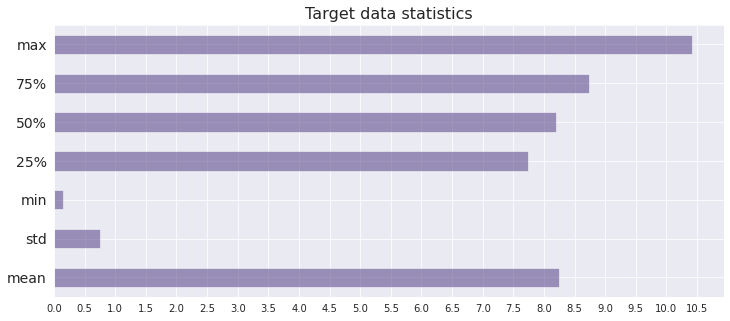

In [31]:
y.describe().iloc[1:].plot.barh(color=v0,alpha=.5,figsize=(12,5))
plt.title('Target data statistics',fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(np.arange(0,10.8,.5));

> #### Minimum value seems to be way below the avrage.

#### Box plot of target data with percentile of .1% and 99.9%

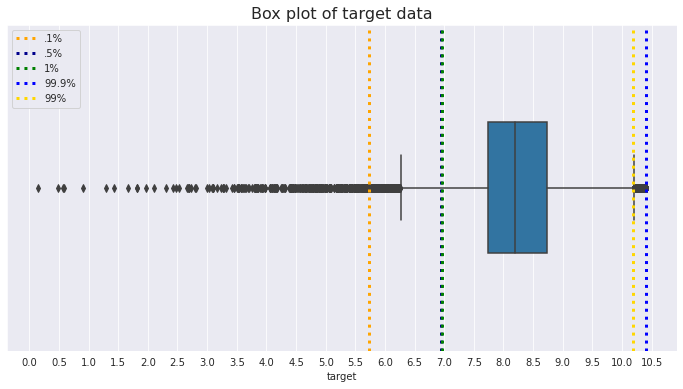

In [32]:
plt.figure(figsize=(12,6))
sns.boxplot(x=y, width=.4);
plt.axvline(np.percentile(y,.1), label='.1%', c='orange', linestyle=':', linewidth=3)
plt.axvline(np.percentile(y,.5), label='.5%', c='darkblue', linestyle=':', linewidth=3)
plt.axvline(np.percentile(y,1), label='1%', c='green', linestyle=':', linewidth=3)
plt.axvline(np.percentile(y,99.9), label='99.9%', c='blue', linestyle=':', linewidth=3)
plt.axvline(np.percentile(y,99), label='99%', c='gold', linestyle=':', linewidth=3)
plt.legend()
plt.title('Box plot of target data', fontsize=16)
plt.xticks(np.arange(0,10.8,.5));

> #### Seems like outliers need to be handled

<a id='ft_eng'></a>
## Cleaning and feature Engineering 

#### Exploring different data trunctation

In [33]:
print('train target .1%: ', np.percentile(train.target,.1))
print('TRUNCATING',end='')
print('.' ,end ='')
time.sleep(.5)
      
min_01= np.percentile(train.target,.1)
train_01_trunc = train[train.target > min_01]
print('.' ,end ='')
time.sleep(.5)

min_05 = np.percentile(train.target,.5)
train_05_trunc = train[train.target > min_05]
print('.' ,end ='')
time.sleep(.5)

min_1 = np.percentile(train.target,1)
train_1_trunc = train[train.target > min_1]
print('.' ,end ='')
time.sleep(.5)


max_99 = np.percentile(train.target,99)
train_1_99_trunc = train[(train.target > min_1) & (train.target < max_99)]
print('\nDone!' ,end ='')

train target .1%:  5.730038895247775
TRUNCATING....
Done!

In [34]:
y_01_trunc = train_01_trunc['target']
features_01_trunc = train_01_trunc.drop(['target'], axis=1)

y_05_trunc = train_05_trunc['target']
features_05_trunc = train_05_trunc.drop(['target'], axis=1)

y_1_trunc = train_1_trunc['target']
features_1_trunc = train_1_trunc.drop(['target'], axis=1)

y_1_99_trunc = train_1_99_trunc['target']
features_1_99_trunc = train_1_99_trunc.drop(['target'], axis=1)

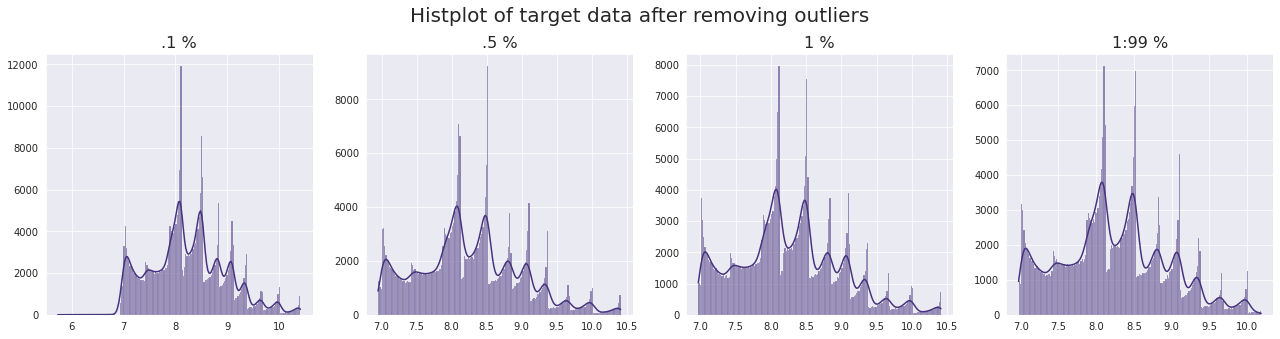

In [35]:
fig, (ax1,ax2,ax3,ax4)= plt.subplots(1,4,figsize=(22,5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=.85, wspace=None, hspace=.3)

sns.histplot(y_01_trunc, kde=True, color= v0, alpha=.6,bins=200,ax=ax1)
ax1.set_ylabel('')
ax1.set_xlabel('')
ax1.set_title('.1 %',fontsize=16)
# ax1.set_xticks(np.arange(5.5,11,.5));

sns.histplot(y_05_trunc, kde=True, color= v0, alpha=.6,bins=200,ax=ax2)
ax2.set_ylabel('')
ax2.set_xlabel('')
ax2.set_title('.5 %',fontsize=16)
# ax2.set_xticks(np.arange(5.5,11,.5));

sns.histplot(y_1_trunc, kde=True, color= v0, alpha=.6,bins=200,ax=ax3)
ax3.set_ylabel('')
ax3.set_xlabel('')
ax3.set_title('1 %',fontsize=16)
# ax3.set_xticks(np.arange(5.5,11,.5));

sns.histplot(y_1_99_trunc, kde=True, color= v0, alpha=.6,bins=200,ax=ax4)
ax4.set_ylabel('')
ax4.set_xlabel('')
ax4.set_title('1:99 %',fontsize=16)
# ax4.set_xticks(np.arange(5.5,11,.5))

fig.suptitle('Histplot of target data after removing outliers', fontsize= 20);

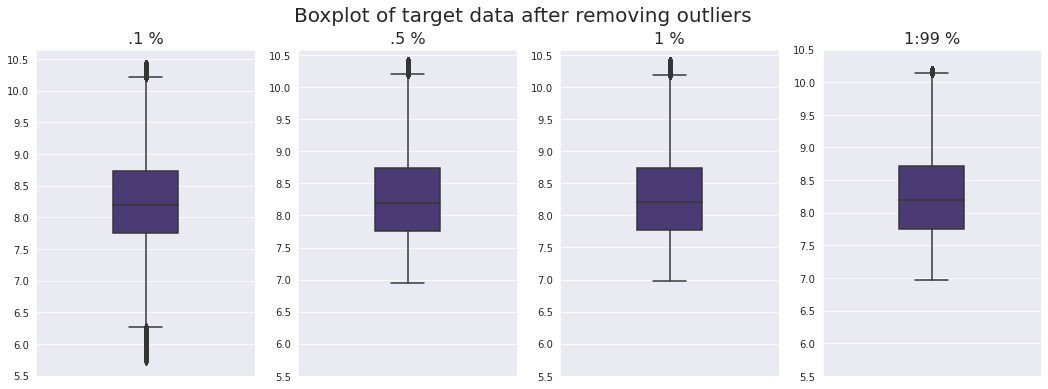

In [36]:
fig, (ax1, ax2, ax3, ax4)= plt.subplots(1,4,figsize=(18,6))

sns.boxplot(y=y_01_trunc, color= v0,ax=ax1, width=.3)
ax1.set_ylabel('')
ax1.set_xlabel('')
ax1.set_title('.1 %',fontsize=16)
ax1.set_yticks(np.arange(5.5,11,.5));

sns.boxplot(y=y_05_trunc, color= v0,ax=ax2, width=.3)
ax2.set_ylabel('')
ax2.set_xlabel('')
ax2.set_title('.5 %',fontsize=16)
ax2.set_yticks(np.arange(5.5,11,.5));

sns.boxplot(y=y_1_trunc, color= v0,ax=ax3, width=.3)
ax3.set_ylabel('')
ax3.set_xlabel('')
ax3.set_title('1 %',fontsize=16)
ax3.set_yticks(np.arange(5.5,11,.5));

sns.boxplot(y= y_1_99_trunc, color= v0,ax=ax4, width=.3)
ax4.set_ylabel('')
ax4.set_xlabel('')
ax4.set_title('1:99 %',fontsize=16)
ax4.set_yticks(np.arange(5.5,11,.5));


fig.suptitle('Boxplot of target data after removing outliers', fontsize= 20);

> #### Outliers still exist but we will need to explore model quality to find out whether or not it's possbile to drop more data, it's also worth mentioning that the histogram shows kind of steps-like behavior around some values.

#### Categorical values handling:
#### mainly there are two way to handle those "aside from dropping them!)
- One-hot encoding
- Ordinal encoding
#### we will explore both to find out the better way to handle categorical variables

#### Using the pd.get_dummies to make one hot encoding to categorical data

In [37]:
train_dummies = pd.get_dummies(features)
test_dummies = pd.get_dummies(test)
train_trunc_dummies_01 = pd.get_dummies(features_01_trunc)
train_trunc_dummies_05 = pd.get_dummies(features_05_trunc)
train_trunc_dummies_1 = pd.get_dummies(features_1_trunc)
train_trunc_dummies_1_99 = pd.get_dummies(features_1_99_trunc)

#### Checking if we lost any information in truncation

In [38]:
all(train_trunc_dummies_1_99.columns == train_dummies.columns) == all(test_dummies.columns == train_dummies.columns)

True

<center><img src='https://c.tenor.com/WRwm-wTN0_8AAAAd/i-just-got-lucky-willie.gif' width='380' height="380"></center>

In [39]:
# OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
# OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(features[cat_cols]))
# OH_cols_test = pd.DataFrame(OH_encoder.transform(test[cat_cols]))

# OH_cols_train.index = features.index
# OH_cols_test.index = test.index

# num_X_train = features.drop(cat_cols, axis=1)
# num_X_test = test.drop(cat_cols, axis=1)

# OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
# OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

#### Now we make an ordinal encoding to explore the model quality using it compared to one hot encoding

In [40]:
OR_encoder = OrdinalEncoder()

OR_cols_train = pd.DataFrame(OR_encoder.fit_transform(features[cat_cols]))
OR_cols_test = pd.DataFrame(OR_encoder.transform(test[cat_cols]))
OR_cols_train_trunc_01 = pd.DataFrame(OR_encoder.transform(features_01_trunc[cat_cols]))
OR_cols_train_trunc_05 = pd.DataFrame(OR_encoder.transform(features_05_trunc[cat_cols]))
OR_cols_train_trunc_1 = pd.DataFrame(OR_encoder.transform(features_1_trunc[cat_cols]))
OR_cols_train_trunc_1_99 = pd.DataFrame(OR_encoder.transform(features_1_99_trunc[cat_cols]))


OR_cols_train.index = features.index
OR_cols_test.index = test.index
OR_cols_train_trunc_01.index = features_01_trunc.index
OR_cols_train_trunc_05.index = features_05_trunc.index
OR_cols_train_trunc_1.index = features_1_trunc.index
OR_cols_train_trunc_1_99.index = features_1_99_trunc.index


OR_cols_train.columns = cat_cols
OR_cols_test.columns = cat_cols
OR_cols_train_trunc_01.columns = cat_cols
OR_cols_train_trunc_05.columns = cat_cols
OR_cols_train_trunc_1.columns = cat_cols
OR_cols_train_trunc_1_99.columns = cat_cols


num_X_train = features.drop(cat_cols, axis=1)
num_X_test = test.drop(cat_cols, axis=1)
num_X_train_trunc_01 = features_01_trunc.drop(cat_cols, axis=1)
num_X_train_trunc_05 = features_05_trunc.drop(cat_cols, axis=1)
num_X_train_trunc_1 = features_1_trunc.drop(cat_cols, axis=1)
num_X_train_trunc_1_99 = features_1_99_trunc.drop(cat_cols, axis=1)

OR_X_train = pd.concat([num_X_train, OR_cols_train], axis=1)
OR_X_test = pd.concat([num_X_test, OR_cols_test], axis=1)
OR_X_train_trunc_01 = pd.concat([num_X_train_trunc_01, OR_cols_train_trunc_01], axis=1)
OR_X_train_trunc_05 = pd.concat([num_X_train_trunc_05, OR_cols_train_trunc_05], axis=1)
OR_X_train_trunc_1 = pd.concat([num_X_train_trunc_1, OR_cols_train_trunc_1], axis=1)
OR_X_train_trunc_1_99 = pd.concat([num_X_train_trunc_1_99, OR_cols_train_trunc_1_99], axis=1)

#### Now we get the mutual information scores of features

In [41]:
# mi_scores_dummies = mutual_info_regression(train_dummies, y, random_state=0)
# mi_scores_dummies = pd.Series(mi_scores_dummies, name="MI_Scores_dummies", index=train_dummies.columns)
# mi_scores_dummies = mi_scores_dummies.sort_values(ascending=False)
# mi_scores_dummies

In [42]:
# mi_scores_ordinal = mutual_info_regression(OR_X_train, y, random_state=0)
# mi_scores_ordinal = pd.Series(mi_scores_ordinal, name="MI_Scores_Ordinal", index=OR_X_train.columns)
# mi_scores_ordinal = mi_scores_ordinal.sort_values(ascending=False)
# mi_scores_ordinal

In [43]:
# fig ,(ax1,ax2) = plt.subplots(2,1,figsize=(28,10))
# plt.subplots_adjust(left=None, bottom=None, right=None, top=.90, wspace=None, hspace=.4)
# sns.barplot(x = mi_scores_dummies.index, y = mi_scores_dummies.values,palette='viridis', ax=ax1)
# sns.barplot(x = mi_scores_ordinal.index, y = mi_scores_ordinal.values,palette='viridis', ax= ax2)
# ax1.tick_params(axis='x',labelrotation=45,labelsize=12)
# ax2.tick_params(axis='x',labelrotation=45,labelsize=12)
# ax1.set_title('Mutual information with target "One hot encoding"',fontsize=18)
# ax2.set_title('Mutual information with target "Ordinal encoding"',fontsize=18)
# fig.suptitle('Mutual information',fontsize=22);

> #### Mutual information seems to agree with pearson correlation as relationship with target seems to be very week.

#### Ratio of features with MI greater than 0

In [44]:
# print('features with MI greater than 0 "one hot encoding":',colored(str(round(100*(mi_scores_dummies > 0).mean(),4)) + '%','green'))

In [45]:
# print('features with MI greater than 0 "ordinal ordinal":',colored(str(round(100*(mi_scores_ordinal > 0).mean(),4)) + '%','green'))

<a id='xgb'></a>

## XGBOOST starter

#### We use GridSearchCV with XGBRegressor to get closer to the best model parameters.

#### Submissions are scored on the root mean squared error 'RMSE' which is defined as: 
$$text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$
#### We can explore the quality of these approaches
- ordinal encoding (before and after truncation)
- one hot encoding (before and after truncation)


#### You might see the following lines of code commented so you can comment it out and explore the different approaches yourself.
#### As a reminder we have the following sets of data to train and explore the quality of their approachs

- train_dummies
- train_dummies with different truncation
- OR_X_train
- OR_X_train with different truncation
#### you can also try different combination of features using MI extracted earlier.

In [46]:
# from sklearn.metrics import SCORERS
# SCORERS.keys()

#### The following is a parameters grid to explore in grid search cross validation

In [47]:
# xgbcpars = {'booster': ['gbtree'],
#             'colsample_bytree': [0.7],
#             'eval_metric': ['rmse'],
#             'gamma': [1],
#             'learning_rate': [0.05,.08],
#             'max_depth': [2,3],
#             'n_estimators': [60000],
#             'objective': ['reg:squarederror'],
#             'random_state': [0],
#             'reg_alpha': [1.5],
#             'reg_lambda': [38],
#             'subsample': [0.9]}

#### Now we make a XGBRegressor to build our model

In [48]:
# reg = xgb.XGBRegressor(tree_method='gpu_hist',nthread=-1 )

#### Putting all in the grid to start test the different parameters.

In [49]:
# grid = Grid(estimator=reg, param_grid= xgbcpars,scoring= 'neg_root_mean_squared_error',
#          verbose= 100, cv= 5 , return_train_score= False)
# grid

#### Fitting the model

In [50]:
# grid.fit(OR_X_train, y)

#### Getting the best best estimator

In [51]:
# grid.best_estimator_

#### Getting the best parameters

In [52]:
#  grid.best_params_

#### Getting the best score

In [53]:
# grid.best_score_

In [54]:
# df_xgb = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["score"])],axis=1)

#### Extracting feature importances

In [55]:
# imp=pd.DataFrame(grid.best_estimator_.feature_importances_, index= OR_X_train.columns ,columns=('imp',))

In [56]:
# imp.sort_values(by='imp',ascending=False,inplace=True)

In [57]:
# imp.imp.plot.bar(figsize=(22,5))
# plt.xticks(rotation=0);

#### Building final model

In [58]:
model = xgb.XGBRegressor(booster ='gbtree', colsample_bytree=0.7,
                         eval_metric= 'rmse', gamma= 1,
                         learning_rate= 0.05, max_depth= 2,
                         n_estimators= 80000, objective= 'reg:squarederror',
                         random_state= 0, reg_alpha= 1.5,
                         reg_lambda= 38, subsample= 0.9,
                         tree_method='gpu_hist')

In [59]:
model.fit(OR_X_train, y);

In [60]:
# preds = model.predict(X_valid)
# print('msqr:', mean_squared_error(y_valid,preds),
#       '\nmabe:',1* mean_absolute_error(y_valid,preds),
#       '\nR2:', r2_score(y_valid,preds))

#### Submit to the competition


In [61]:
# Use the model to generate predictions
predictions = model.predict(OR_X_test)

# Save the predictions to a CSV file
output = pd.DataFrame({'Id': OR_X_test.index,
                       'target': predictions})
output.to_csv('submission.csv', index=False);

<h2><center><font color='red'>Upvote Or Else...</font></center></h2>
<center><img src="https://i.imgur.com/Sbpg1MS.gif"></center>